In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd

### REPORTE 4

* SOFIA DAGER
* 20201095

### PARTE 1 REPORTE

El objetivo principal del texto de Mendoza es explicar y modelar una política monetaria en el cual se incluyen los modelos de demanda y oferta agregada, para a través de esto contrarrestar o disminuir las diferentes consecuencias que la crísis del 2008 y 2009 dejaron en el país. Comienza su texto explicando e introduciendo la importancia de la política monetaria en la economía globalmente. Además, se da un poco de contexto sobre la economía estadounidense, país sede de la crísis mencionada anteriormente. 

El artículo presentado por Mendoza, contiene muchas fortalezas. Entre estas la explicación de los gráficos que presenta a lo largo del texto; sin embargo, considero una debilidad el hecho de que algunos de los gráficos están muy llenos de información, lo que complica al lector entenderlos. Aunque se da una buena explicación para los mismos, siempre es importante que el lector pueda entender los gráficos al verlos. No obstante, hay otros que contienen poca información o que las variabes no son tan explicadas. Sería bueno tener gráficos mejor explicados.

Otra fortaleza encontrada en el texto son los modelos presentados por el autor. Estos son útiles para poder entender cómo disminuir consecuencias de la crísis de 2008-2009 y sería interesante que el gobierno los tome también en cuenta para las diferentes políticas monetarias que se apliquen en el país. Sería importante, sin embargo, explicar un poco más a fondo qué significa cada variable para así poder entender de manera más didáctica lo que se intenta explicar. 

A pesar de las debilidades mencionadas anteriormente, considero que el artículo sí cumple el objetivo planteado. Los modelos económicos presentados son de mucha utilidad para poder entender cómo mejorar la situación y contrarrestar las consecuencias traídas por la crísis del final de los 2000. 

### PARTE 2 CÓDIGO

Con la ecuación de la curva IS

$$ r = \frac{B_o}{h} - \frac{B_1}{h}Y $$

- Donde $ B_0 = C_o + I_o + G_o + X_o $ y $ B_1 = 1 - (b - m)(1 - t) $

Ecuación de la curva LM:

$$  r = -\frac{1}{j}\frac{Mo^s}{P_o} + \frac{k}{j}Y $$

Se puede reducir ambas ecuaciones para encontrar el nivel de Ingresos equilibrio $(Y^e)$ y la tasa de interés de equilibrio $(r^e)$:

$$ -\frac{1}{j}\frac{Mo^s}{P_o} + \frac{k}{j}Y = \frac{B_o}{h} - \frac{B_1}{h}Y $$

Ingreso de equilibrio:

$$ Y^e = \frac{j B_o}{k h + j B_1} + (\frac{h}{k h + j B_1})\frac{Ms_o}{P_o} $$

Tasa de interés de equilibrio:

$$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})\frac{Ms_o}{P_o} $$

Estas dos ecuaciones representan el modelo IS-LM

#### GRÁFICO

In [4]:
# Para la Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
# Para la Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

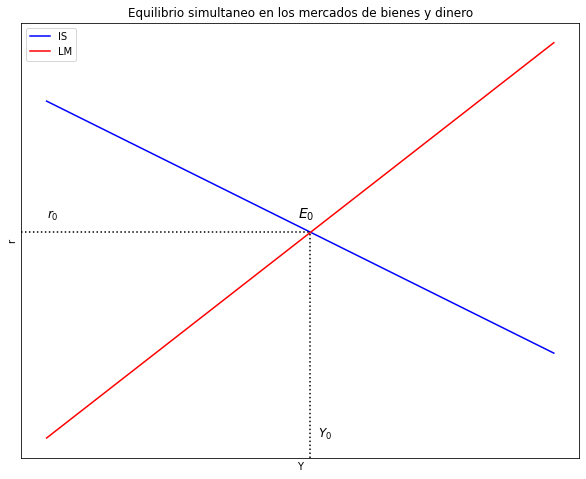

In [5]:
# Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(r_lm)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
# IS
ax.plot(Y, r_is, label = "IS", color = "blue") #IS
# LM
ax.plot(Y, r_lm, label="LM", color = "red")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
# Graficar la linea horizontal - r
plt.axvline(x=51.5,  ymin= 0, ymax= 0.52, linestyle = ":", color = "black")
# Grafica la linea vertical - Y
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "black")

# Plotear los textos 
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-10, '$Y_0$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="Equilibrio simultaneo en los mercados de bienes y dinero", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

### Ecuaciones de equilibrio

In [6]:
# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

### 3. Estática comparativa

#### - Política Fiscal Contractiva:

- Mercado de Bienes
$$ Go ↓ → DA↓ → DA<Y → Y ↓$$ 
- Mercado de dinero
$$ Y↓ → Md↓ → Md < Ms → r↓ $$ 

- **Matemática**

In [9]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io - Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [11]:
df_Y_eq_Go = diff(Y_eq, Go)
print("El Diferencial del Producto con respecto al diferencial del gasto autonomo = ", df_Y_eq_Go)  # este diferencial es positivo

El Diferencial del Producto con respecto al diferencial del gasto autonomo =  -k/(h*k + j*(-(1 - t)*(b - m) + 1))


In [12]:
df_r_eq_Go = diff(r_eq, Go)
print("El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo = ", df_r_eq_Go)  # este diferencial es positivo

El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo =  -j/(h*k + j*(-(1 - t)*(b - m) + 1))


### Gráfico

In [13]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [14]:
#--------------------------------------------------
    # NUEVA curva IS: reducción Gasto de Gobienro (Go)
    
# Definir SOLO el parámetro cambiado
Go = 20

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

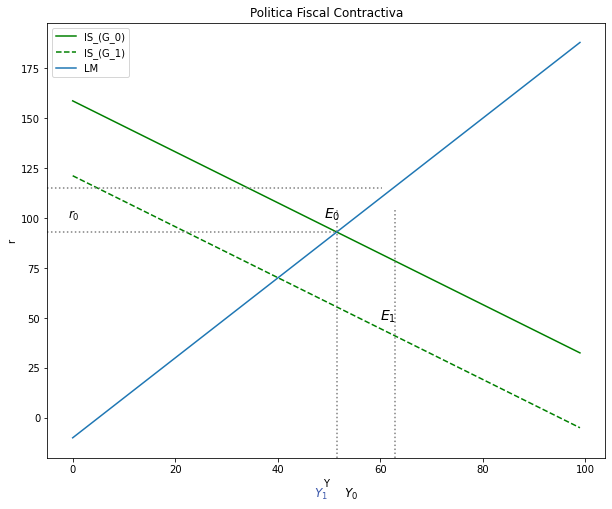

In [27]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(G_0)", color = "green") #IS_orginal
ax.plot(Y, r_G, label = "IS_(G_1)", color = "green", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "C0")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=51.5,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

plt.axvline(x=63,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=115, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(60,49, '$E_1$', fontsize = 14, color = 'black')

plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Politica Fiscal Contractiva", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

#### Política monetaria contractiva

- Mercado de dinero
$$ Ms↓ → M^o↓ → M^o < M^d → r↑ $$

- Mercado de Bienes
$$ r↑ → I↓ → DA<Y → Y↓ $$ 

In [29]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [30]:
df_r_eq_Ms = diff(r_eq, Ms)
print("El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria = ", df_r_eq_Ms)  # este diferencial es positivo

El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria =  h/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [31]:
df_Y_eq_Ms = diff(Y_eq, Ms)
print("El Diferencial del producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)  # este diferencial es positivo

El Diferencial del producto con respecto al diferencial de la masa monetaria =  -(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [32]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [37]:
# Definir SOLO el parámetro cambiado
Ms = 20

# Generar nueva curva LM con la variacion del Ms
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

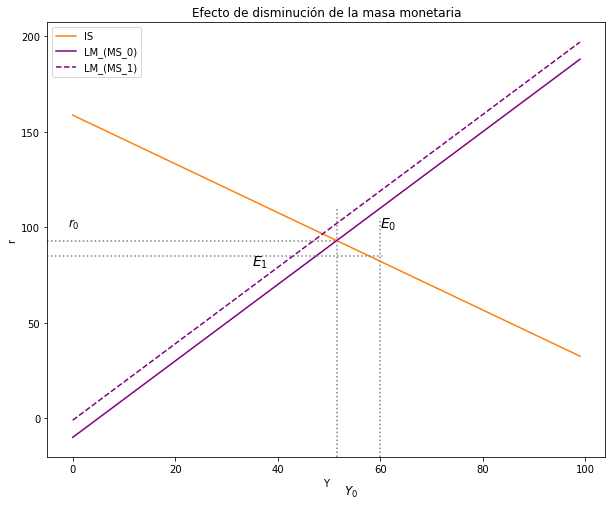

In [48]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C1") #IS_orginal
ax.plot(Y, i, label="LM_(MS_0)", color = "purple")  #LM_original

ax.plot(Y, i_Ms, label="LM_(MS_1)", color = "purple", linestyle = 'dashed')  #LM_modificada

# Lineas de equilibrio_0 
plt.axvline(x=51.5,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Lineas de equilibrio_1 
plt.axvline(x=60,  ymin= 0, ymax= 0.55, linestyle = ":", color = "grey")
plt.axhline(y=85, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(35,80, '$E_1$', fontsize = 14, color = 'black')

#plt.axhline(y=68, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Textos ploteados
plt.text(60,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
#plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Efecto de disminución de la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()
